# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
categorical_features = [
 'images_requester_roles',
 'images_study_types',
 'labos_requester_roles',
 'sectors_last_sector',
 'sectors_names',
 'surgeries_actual',
 'surgeries_anesthesia_types',
 'surgeries_bact_positive',
 'surgeries_injury_condition',
 'surgeries_post_surgery_condition',
 'surgeries_scheduled',
 'surgeries_scheduled_done',
 'surgeries_services',
 'surgeries_types',
 'gender',
 'insurance_entity',
 'entity_group',
 'origin',
 'admission_sector',
 'isolation',
 'presumptive_dianogsis',
 'responsible_sector',
 'ARM_TEP',
 'CEC_TEP',
 'request_origin',
 'request',
 'request_diagnosis',
 'request_sector']

In [5]:
numerical_features = ['hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'sectors_count',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count',
 'emergency_service',
 'new_born_weight',
 'new_born_gestation_age',
 'PIM2TEP',
 'high_risk_TEP',
 'low_risk_TEP',
 'patient_age']

In [6]:
len(categorical_features)+len(numerical_features)

59

In [7]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                'categorical_features' : categorical_features ,
                'numerical_features' : numerical_features,
               'scale_numerical': False}

In [8]:
lgbm_extra_features = Model(**model_params)
lgbm_extra_features.transform(data)

Fitting pipeline...
Transforming data...


### Baseline

In [9]:
len(lgbm_extra_features.model_features)

26722

In [10]:
%%time
import time
start = time.time()
lgbm_extra_features.fit_classifier()
end = time.time()


Training classifier
[10]	training_set's auc: 0.824071	validation_set's auc: 0.81389
[20]	training_set's auc: 0.83094	validation_set's auc: 0.819815
[30]	training_set's auc: 0.835072	validation_set's auc: 0.823146
[40]	training_set's auc: 0.838991	validation_set's auc: 0.826154
[50]	training_set's auc: 0.841834	validation_set's auc: 0.827791
[60]	training_set's auc: 0.843521	validation_set's auc: 0.82875
[70]	training_set's auc: 0.844966	validation_set's auc: 0.829567
[80]	training_set's auc: 0.846214	validation_set's auc: 0.830137
[90]	training_set's auc: 0.847337	validation_set's auc: 0.830653
[100]	training_set's auc: 0.848381	validation_set's auc: 0.830931
CPU times: user 41.8 s, sys: 390 ms, total: 42.2 s
Wall time: 13 s


In [11]:
perf = lgbm_extra_features.get_performance_metrics()

training AUC ROC score:  0.84838082524116
validation AUC ROC score:  0.8309305831625746
relative over-fitting:  0.02056887845576304


In [12]:
lgbm_extra_features.model_features

['hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'sectors_count',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duratio',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count',
 'emergency_service',
 'new_born_weight',
 'new_born_gestation_age',
 'PIM2TEP',
 'high_risk_TEP',
 'low_risk_TEP',
 'patient_age',
 'images_requester_roles_',
 'images_requester_roles_ADM__DE',
 'images_requester_roles_ADM_DE_',
 'images_requester_roles_ADM_DE_',
 'images_requester_roles_ADM_DE_',
 'images_requester_roles_ADM_DE_',
 'images_requester_roles_ADM_DE_',
 'images_requester_r

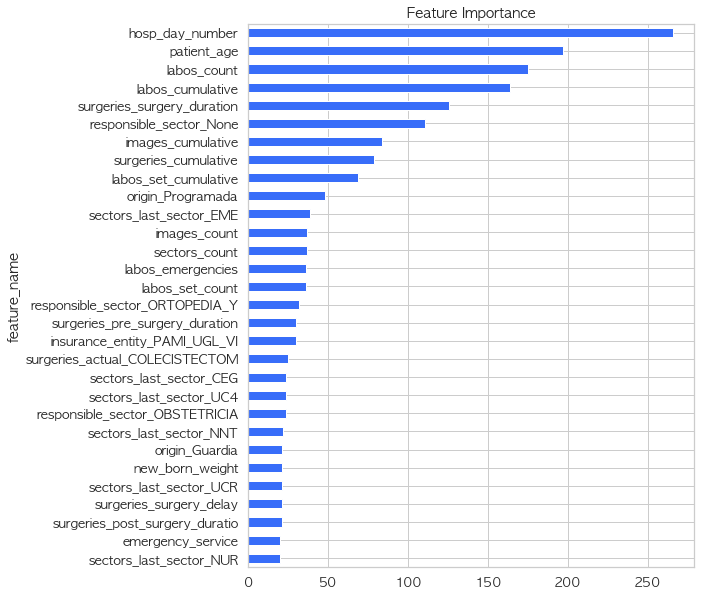

In [13]:
import seaborn as sns
sns.set(style="whitegrid",font_scale=1.2,font='AppleGothic', palette="rainbow")
lgbm_extra_features.plot_feature_importance(30)

In [13]:
# Write to the csv file ('a' means append)
import csv
out_file = 'experiments/output.csv'
of_connection = open(out_file, 'a')
writer = csv.writer(of_connection)
writer.writerow([2, 
                 'extra_features', 
                 'gdbt', 
                 lgbm_extra_features.n_features,
                 end-start,
                 perf['auc_training'],
                 perf['auc_validation'],
                 perf['overfitting']
                ])
of_connection.close()